# Prediktiv analyse
Formålet med predikativ analyse er å finne trender for å kunne prediktere fremtidige resultater. Dette gjør man ved å implementere regresjon.

Første steg er å forberede dataene ved å identifisere relevante fukjoner og målvariabler. Man må også håndteere mangdlende verdier og se hvordan det kan påvirke modellenes nøyaktighet. 

Andre steg er å trene regresjonsmodellen på de rensede dataene og evaluere ytelsen. 


#### Manglende verdier
Forbreding og rensing av dataen er allerede en stor del av oppgaven. Datasettet er defor allerede veldig rent og vi har allerede definerte metoder på hvordan vi skal rense et datasett. For da å se nærmere på akuratt hvordan manglende data blir håndtert og hvordan det påvirker videre resultater kan man se på spesifike eksempler. 

Det er laget en class med tre funksjoner. Den første funksjonen lager en dataframe med flere NaN enn før og renser denne. Den andre funksjonen plotter både de originale verdierne og de utregnede verdiene for NaN. Den siste funksjonen finner forskjellige statistiske verdier og sammenligner de originale med de utregnede. 

In [15]:
import pandas as pd
import os
import sys 

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")

from modelling.missing_values import MissingValues
mv = MissingValues()


In [2]:
print(mv.make_dataframe("Middeltemp"))

(            Tid  Middeltemp
0    2014-01-01         3.4
1    2014-01-02         2.7
2    2014-01-03         4.2
3    2014-01-04         4.8
4    2014-01-05         3.7
..          ...         ...
195  2014-07-15        17.8
196  2014-07-16        20.2
197  2014-07-17        17.3
198  2014-07-18        18.5
199  2014-07-19        20.8

[200 rows x 2 columns],             Tid  Middeltemp
0    2014-01-01         3.4
1    2014-01-02         3.8
2    2014-01-03         4.2
3    2014-01-04         4.0
4    2014-01-05         3.7
..          ...         ...
195  2014-07-15        17.8
196  2014-07-16        18.0
197  2014-07-17        18.3
198  2014-07-18        18.5
199  2014-07-19        20.8

[200 rows x 2 columns])


Her kan man se at noen av verdiene er annerledes. Dette skylles at de ble erstattet med NaN, deretter utregnet til en tilnærmet verdi.

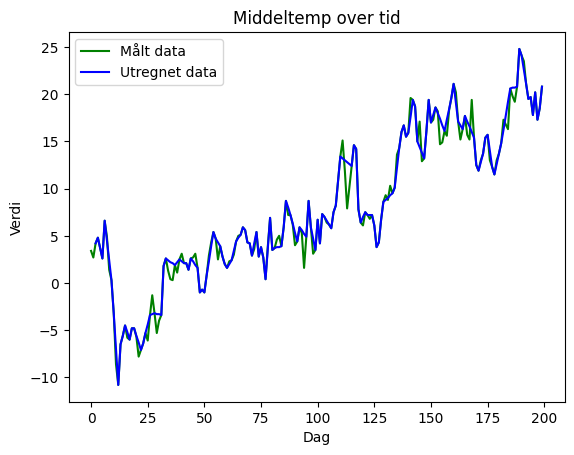

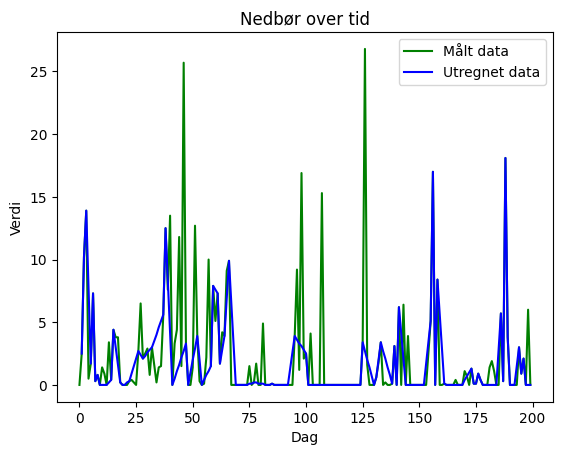

In [3]:
mv.measured_calculated_plot("Middeltemp")
mv.measured_calculated_plot("Nedbør",0.5)

Som man kan se i diagrammet er begge linjediagrammene tilsvarende like. Det som siller dem er at den målte dataen har flere verdier som er utenom normalen. Dette gjør at våre data mister ekstremverdier som er utenom normalen. Dette er fordi tilnærmingen bruker "interpolate(method='linear')" som bruker den siste kjente verdien før og første etter NaN. Dette kan påvikre forskjellige statistiske verdier som gjennomsnitt og typetall. 

In [4]:
print(mv.table("Middeltemp"))
print(mv.table("Middeltemp",0.7))

       Middeltemp (Original)  Middeltemp (Utrgnet)  Middeltemp (Differanse)
count                 200.00                200.00                     0.00
mean                    7.77                  7.72                     0.05
std                     7.81                  7.67                     0.14
min                   -10.80                 -8.60                    -2.20
25%                     2.70                  2.78                    -0.08
50%                     6.20                  6.20                     0.00
75%                    14.92                 15.12                    -0.20
max                    24.80                 24.10                     0.70
       Middeltemp (Original)  Middeltemp (Utrgnet)  Middeltemp (Differanse)
count                 200.00                195.00                     5.00
mean                    7.77                  7.86                    -0.09
std                     7.81                  7.46                     0.35
min         

"count" er antall elementer
"mean" er gjennomsnitt
"std" er standardavvik
"min" er den minste verdien i datasettet
"25%" er første kvartil, altså 25% av dataen er under verdien
"50%" er medianen 
"75%" er tredje kvartil, altså 75% av dataen er under verdien
"max" er den største verdien i datasettet 

Forskjellen i count skylles at endepunktene har NaN-verdier. Det er fordi "interpolate(method='linear')" avhenger av et start og sluttpunkt. 

Når "min" og "maks" ikke er det samme i Originalen som i den utregnede verdiens skylles det at "min"/"maks" er erstattet med NaN.


Gjennomsnitt, standardavvik, første kvartid, medianen og tredje kvartil er alle påvirket av at flere verdier i datasettet er anderledes. I eksempelet over er den første tabellen mer komplett enn den andre (frac=0.35, frac=0.5). Dette gjør at de forskjellige statistiske verdiene er veldig forskjellig fra hverandre. Det demonstrerer at det datasett med færre NaN gir et bredre resultat for statistiske utregninger enn et med flere NaN-verdier. 



## Modellering

Lag minst tre forskjellige typer visualiseringer (f.eks. linjediagrammer, søylediagrammer og scatterplots) for å representere endringer i eksempelvis luftkvalitet og temperaturdata over tid. Forklar valget av visualiseringstype for hver graf.
Implementer visualiseringer ved hjelp av Matplotlib og Seaborn. Inkluder tilpassede akser, titler, og fargepaletter for å forbedre lesbarheten og estetikk.
***
1. Linjediagram
2. Søylediagram
3. Scatterplots
***
*(Implementer visualiseringer ved hjelp av Matplotlib og Seaborn. Inkluder tilpassede akser, titler, og fargepaletter for å forbedre lesbarheten og estetikk.)*

Data Preparation
Handling Missing Values: Any missing values in the dataset are dropped.
Feature Selection: The features (Weight and Volume) and the target variable (CO2) are selected.
Feature Scaling: The features are scaled using StandardScaler to ensure they are on a similar scale.
Modeling
Data Splitting: The data is split into training and test sets using train_test_split.
Model Training: A linear regression model is trained on the training data.

Gitt ut ifra *data_analysis* og *data_visualisering* jobbes det videre med modellering av korrelasjonen mellom 'Snø' og 'Middeltemp'. Deretter vil det bli laget til en modell per værdata som hver og en viser utvikling over ting, naturligvis vil dato/'Tid' den variabelen værdatene vil være avhegig av. Predikasjonsmodellene er avhegig av at datene de tar inn er numerisk data, dvs. at andre datatyper må konverteres, og de kategoriene fra hver kolonne i ***"df"*** må gjennomgås. Altså vil datetime håndtert slik at det lages til nye kolonner på df til en ny DataFrame for å håndtere dato som *numeric* for modelleringsfunkjsoner som *LinearRegression()* og fler. Modellene testes med testsettet som er igjen etter oppdeling av både test og treningsett med en funksjon til predikasjon. For en bedre tilnærming, vil det bli gjort en egen modeling for utvikling av høye verdier som går over grensene gitt i *data_analysis*, ettersom regresjonsmodellene jevner ut og vil ikke kunne predikere de mer ekstreme værtilfellene som anslås å bli flere fremover. Helt til slutt skal modellene brukes til å anslå utvikling mellom 2025-2030.

In [31]:
# MANAGING CATEGORIAL DATA

# Sorting out the ricght columns
df["Tid"] = pd.to_datetime(df["Tid"], format="%Y-%m-%d")
kolonner_å_fjerne = {'Navn', 'Stasjon'}
eksisterende_kolonner = kolonner_å_fjerne.intersection(df.columns)
if eksisterende_kolonner:
    df = df.drop(columns=eksisterende_kolonner)

df_modified = df.select_dtypes(include=['number', 'datetime']).copy()
# Convert 'Tid' to numeric??

df_modified["Tid_num"] = (df_modified["Tid"] - df_modified["Tid"].min()).dt.days
df_modified["År"] = df_modified["Tid"].dt.year
df_modified["Måned"] = df_modified["Tid"].dt.month

# DIVIDING DATA

# Select non-numeric columns for target variable (y)

df_time = df_modified[["Tid_num", "År", "Måned"]]  # Tid relaterte kolonner
y = df_modified.select_dtypes(include=['number']).copy()  # Numeriske kolonner
y = y.drop(columns = df_time.columns)  # Fjern tidskolonnene fra målvariabelen

# Features and target variable
X = df_modified[[column for column in df_modified.columns if column not in y.columns]].copy()

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'''Dataframe: 
      \n {df_modified.head()}
      \n X_train:
      {X_train.head()} 
      \n X_test:
      {X_test.head()}
      \n y_train: 
      {y_train.head()}
      \n y_test:
      {y_test.head()}''')

Dataframe: 
      
          Tid  Makstemp  Mintemp  Middeltemp  Snø  Nedbør  Middelvind  \
0 2014-01-01       5.1      2.0         3.4  0.0     0.0         2.4   
1 2014-01-02       3.5      1.6         2.7  0.0     2.5         2.9   
2 2014-01-03       5.7      2.2         4.2  0.0    10.2         3.3   
3 2014-01-04       6.0      3.2         4.8  0.0    13.9         2.6   
4 2014-01-05       5.7      2.7         3.7  0.0     0.5         2.7   

   Høye vindkast  Tid_num    År  Måned  
0            5.8        0  2014      1  
1            5.7        1  2014      1  
2            6.4        2  2014      1  
3            6.8        3  2014      1  
4            5.0        4  2014      1  
      
 X_train:
                  Tid  Tid_num    År  Måned
2968 2022-02-16     2968  2022      2
3429 2023-05-23     3429  2023      5
3980 2024-11-24     3980  2024     11
2823 2021-09-24     2823  2021      9
3588 2023-10-29     3588  2023     10 
      
 X_test:
                  Tid  Tid_num   

Før trening av modell over tid, har vi først lyst å vise at man kan finne sammenhenger mellom uavhegige og avhegige variabler slik det ble vist i data_analysis for korrelasjon. Selv om det er en selvfølgelig at høyere temperatur gir mindre snø, så kan vi trene opp en modell for å vise hvordan sammenhengen mellom uavhegige og avhegige verdier kan behandles til videre tilpasning av modeller. F.eks. regne ut verdier for snø når temperaturen er estimert.

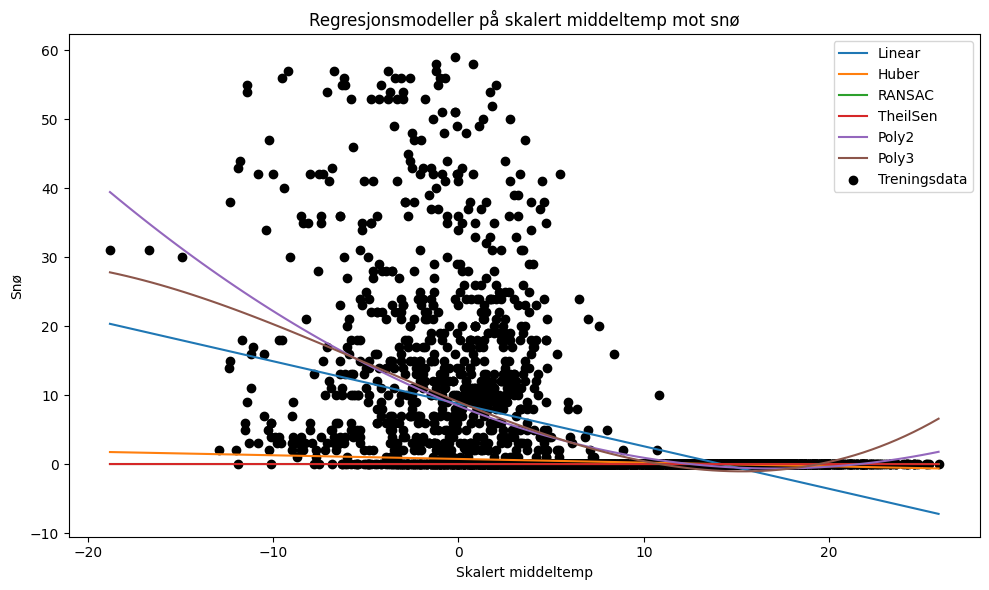

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Preparing training- and test-set
independent = ['Makstemp', 'Mintemp', 'Middeltemp']
dependent = 'Snø'
X_snø = df_modified[independent].copy()
y_snø = df_modified[dependent].copy()

X_train_snø, X_test_snø, y_train_snø, y_test_snø = train_test_split(X_snø, y_snø, test_size=0.2, random_state=0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_snø)
X_test_scaled = scaler.transform(X_test_snø)

# Separating for temperature
middeltemp_train = X_train_snø[["Middeltemp"]].values
middeltemp_plot = np.linspace(middeltemp_train.min(), middeltemp_train.max(), 100).reshape(-1, 1)

# List of modells
models = {
    "Linear": LinearRegression(),
    "Huber": HuberRegressor(),
    "RANSAC": RANSACRegressor(random_state=42),
    "TheilSen": TheilSenRegressor(random_state=42),
    "Poly2": LinearRegression(),
    "Poly3": LinearRegression()
}

# Define the df for all of the modells
fit_df = pd.DataFrame(index=middeltemp_plot.flatten())

# Linear modells
for name in ["Linear", "Huber", "RANSAC", "TheilSen"]:
    model = models[name].fit(middeltemp_train, y_train_snø)
    fit_df[name] = model.predict(middeltemp_plot)

# Polynomial 2. grad
poly2 = PolynomialFeatures(degree=2)
middeltemp_poly2 = poly2.fit_transform(middeltemp_train)
plot_poly2 = poly2.transform(middeltemp_plot)
models["Poly2"].fit(middeltemp_poly2, y_train_snø)
fit_df["Poly2"] = models["Poly2"].predict(plot_poly2)

# Polynomial 3. grad
poly3 = PolynomialFeatures(degree=3)
middeltemp_poly3 = poly3.fit_transform(middeltemp_train)
plot_poly3 = poly3.transform(middeltemp_plot)
models["Poly3"].fit(middeltemp_poly3, y_train_snø)
fit_df["Poly3"] = models["Poly3"].predict(plot_poly3)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for col in fit_df.columns:
    ax.plot(fit_df.index, fit_df[col], label=col)
ax.scatter(middeltemp_train, y_train_snø, c="k", label="Treningsdata")
ax.set_title("Regresjonsmodeller på skalert middeltemp mot snø")
ax.set_xlabel("Skalert middeltemp")
ax.set_ylabel("Snø")
ax.legend()
plt.tight_layout()
plt.show()

Modellene i figuren over viser hvordan de lineære modellene utspillerer seg, både for standarderen Linear, men også Huber, RANSAC og TheilSen. De tar henholdvis gradvis mindre hensyn til outliers. Som betyr at den blir flatere. Den viser ulempen med modellering, at modellene vil, selv for modeller med grad 2 og 3 for Polynominal, så vil støy og outliers bli eksludert. Det betyr at ekstreme verider blir utelatt i prediksjoner. Det er her dilemma mellom det å fange kun støy eller faktisk fange ekstreme verdier kommer op. Videre skal vi se på hvor god utelling de ulike modellene for hver grad har. Ettersom Huber, RANSAC og TheilSen er lineære vil det være unødvendig å se på disse i denne sammenheng, fordi datasettet inneholder peroiodiske svingninger, som allerede nå tilsier at en lineær modell vil gi dårlgig utelling for f.eks. snø og temperatur. Men først kvalitetssikrer vi at trenings- og testsettet er optimalt dekkende.

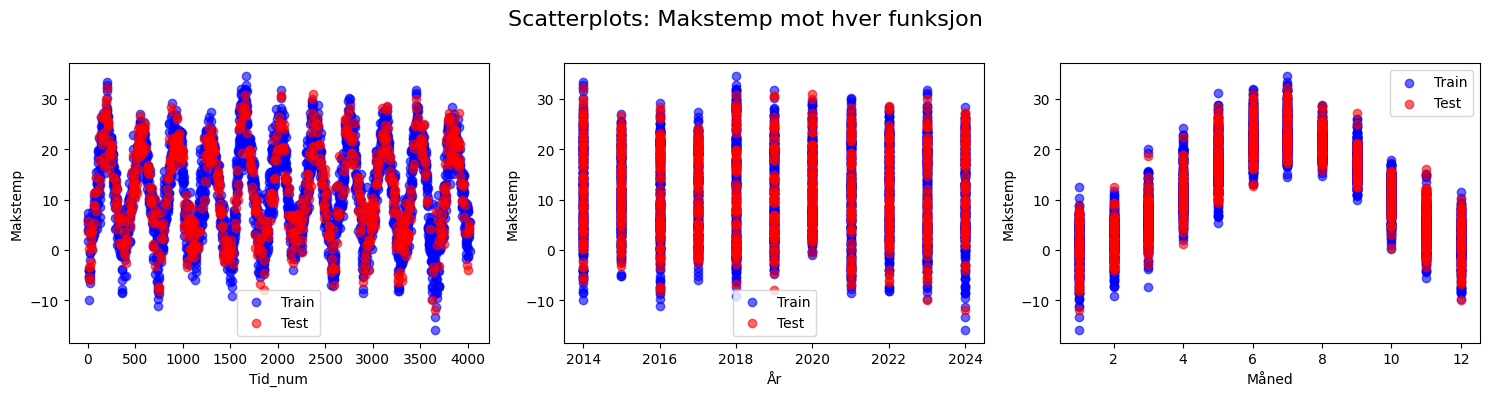

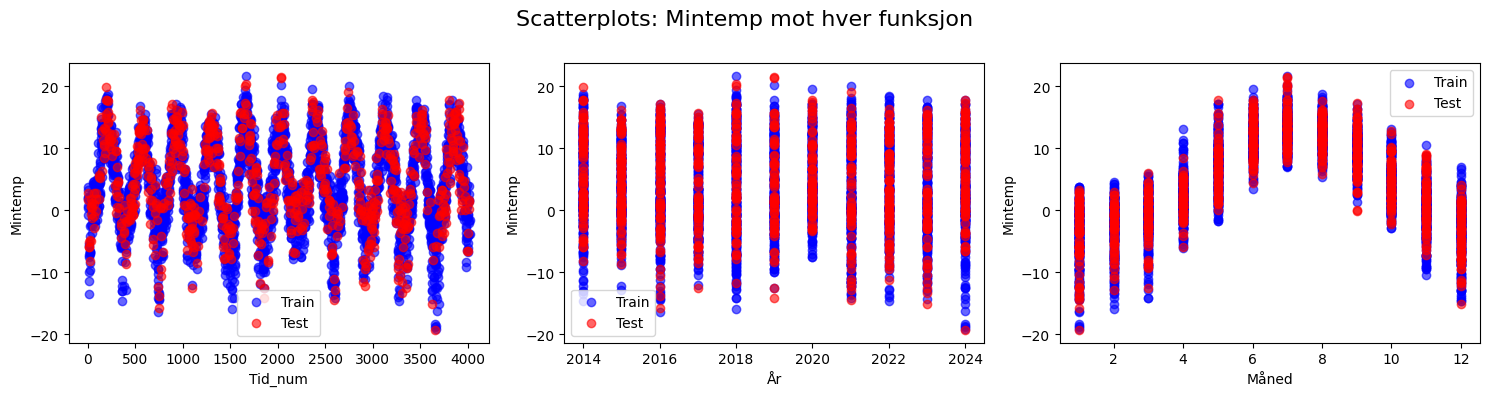

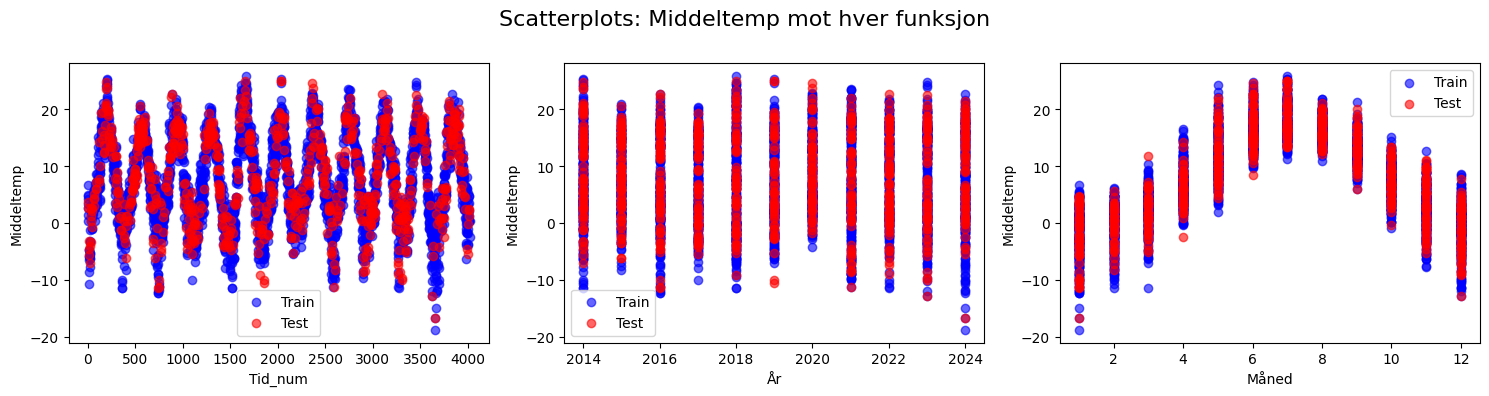

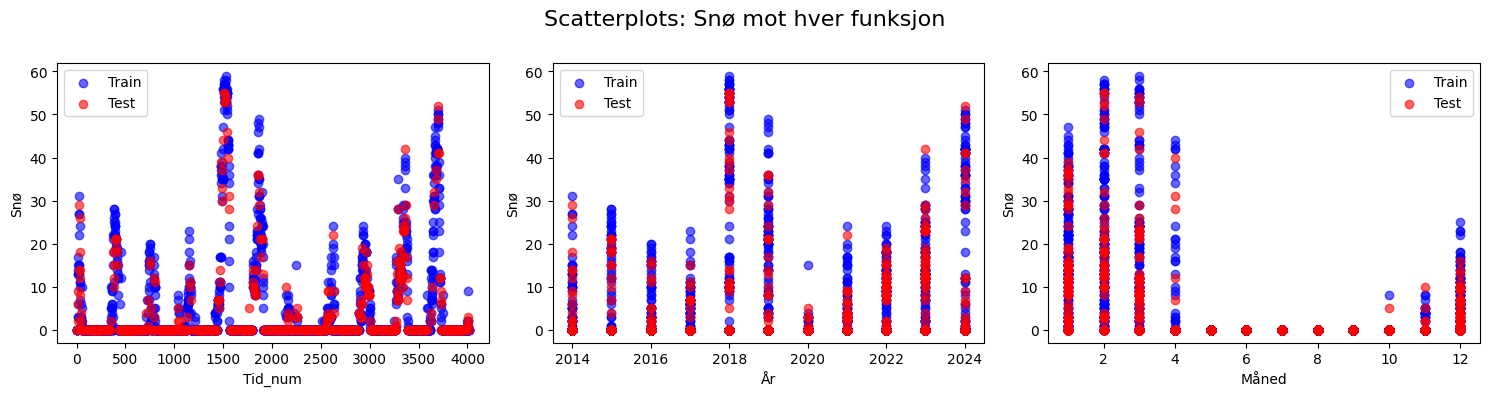

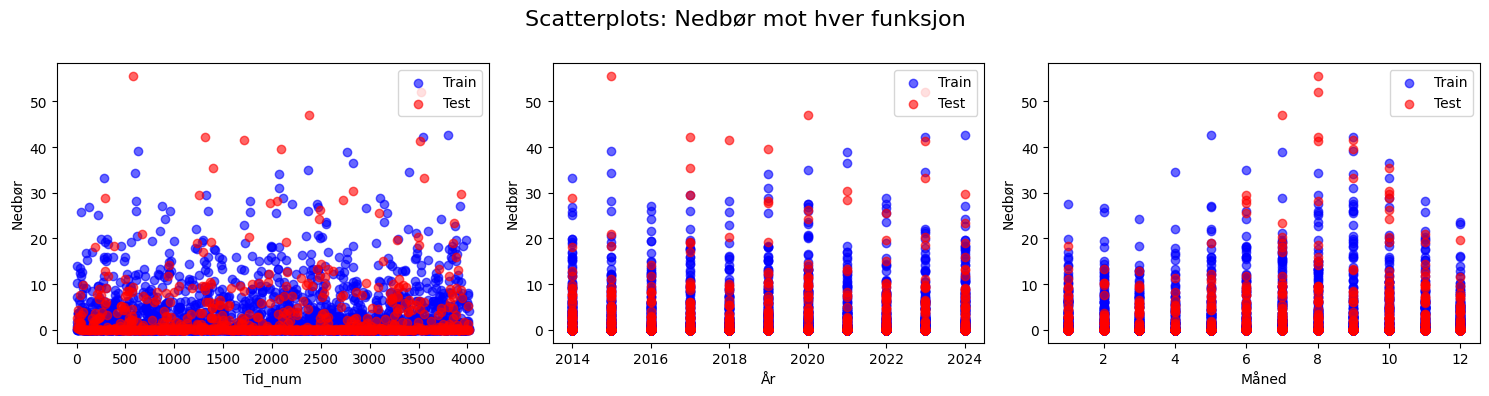

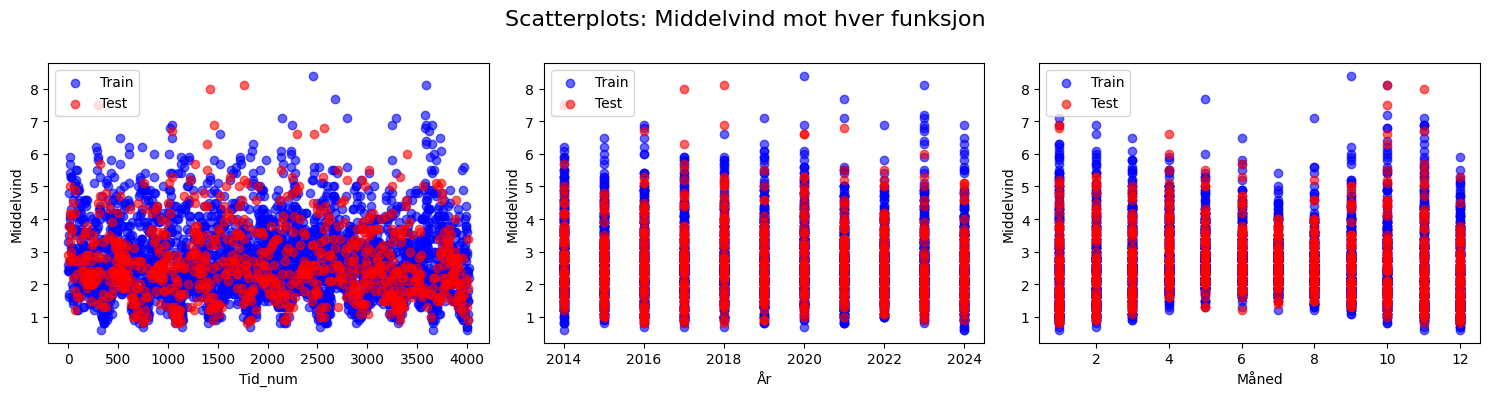

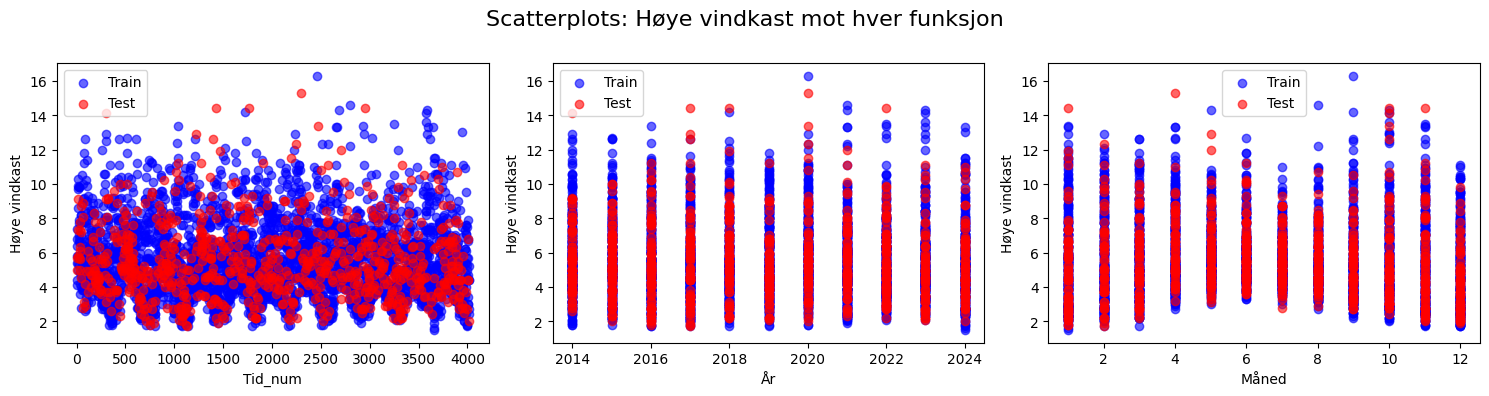

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Remove 'Tid' since it´s dtype: datetime
X_train = X_train.drop(columns=['Tid'], errors='ignore')
features = X_train.columns

try:
    n_features = len(features)
    n_cols = 3
    n_rows = int(np.ceil(n_features / n_cols))

    # Checking for every day ('Tid_num'), every year ('År') and every month ('Måned')
    for col in y.columns:
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
        axs = axs.flatten()  # axes need to be flatten

        for i, feature in enumerate(features):
            ax = axs[i]
            ax.scatter(X_train[feature], y_train[col], color="blue", label="Train", alpha=0.6)
            ax.scatter(X_test[feature], y_test[col], color="red", label="Test", alpha=0.6)
            ax.set_xlabel(feature)
            ax.set_ylabel(col)
            ax.legend()

        fig.suptitle(f'Scatterplots: {col} mot hver funksjon', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
except ValueError: 
    print('Ingen funksjoner å plotte!')



Her får vi også igjen en god oversikt at store engder av datene er sykliske eller har flere topper som den lineære modellen ikke vil kunne klare å fange.

## Modellering

Tar i bruk metoder som LinearRegression og PolynomialFeatures for å få modeller som kan brukes til å prediktere testen slik at det blir satt prøve på modellen. (Gjør for polynomer av grad 2 og 3.)

### Prøver med polynom med første- til og med tredje grad

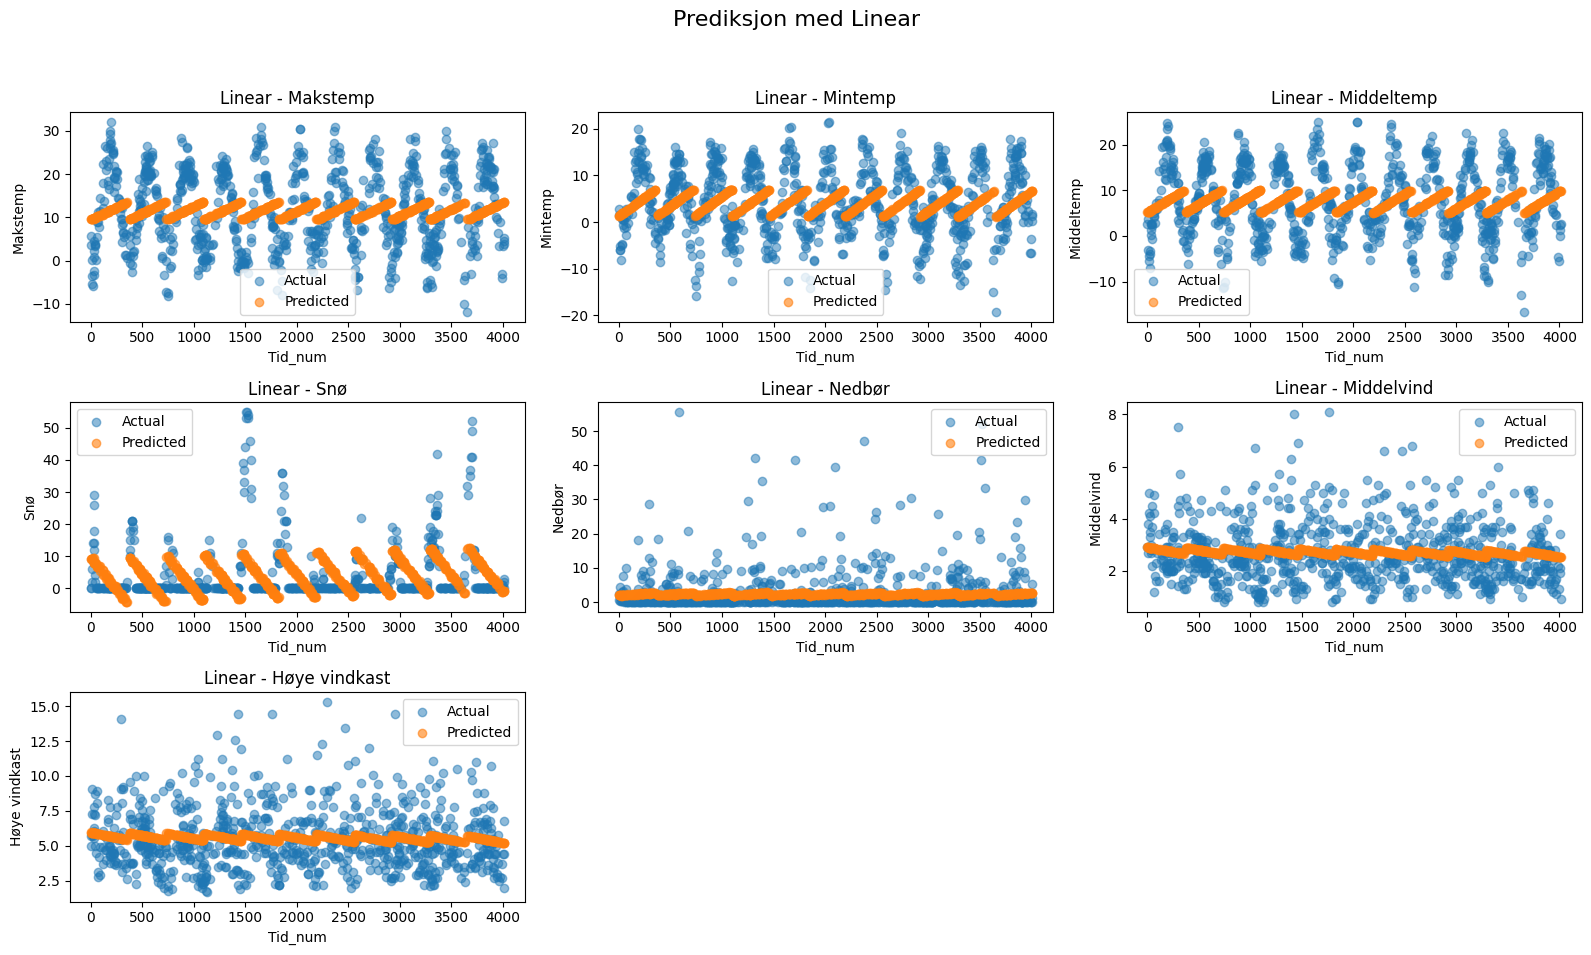

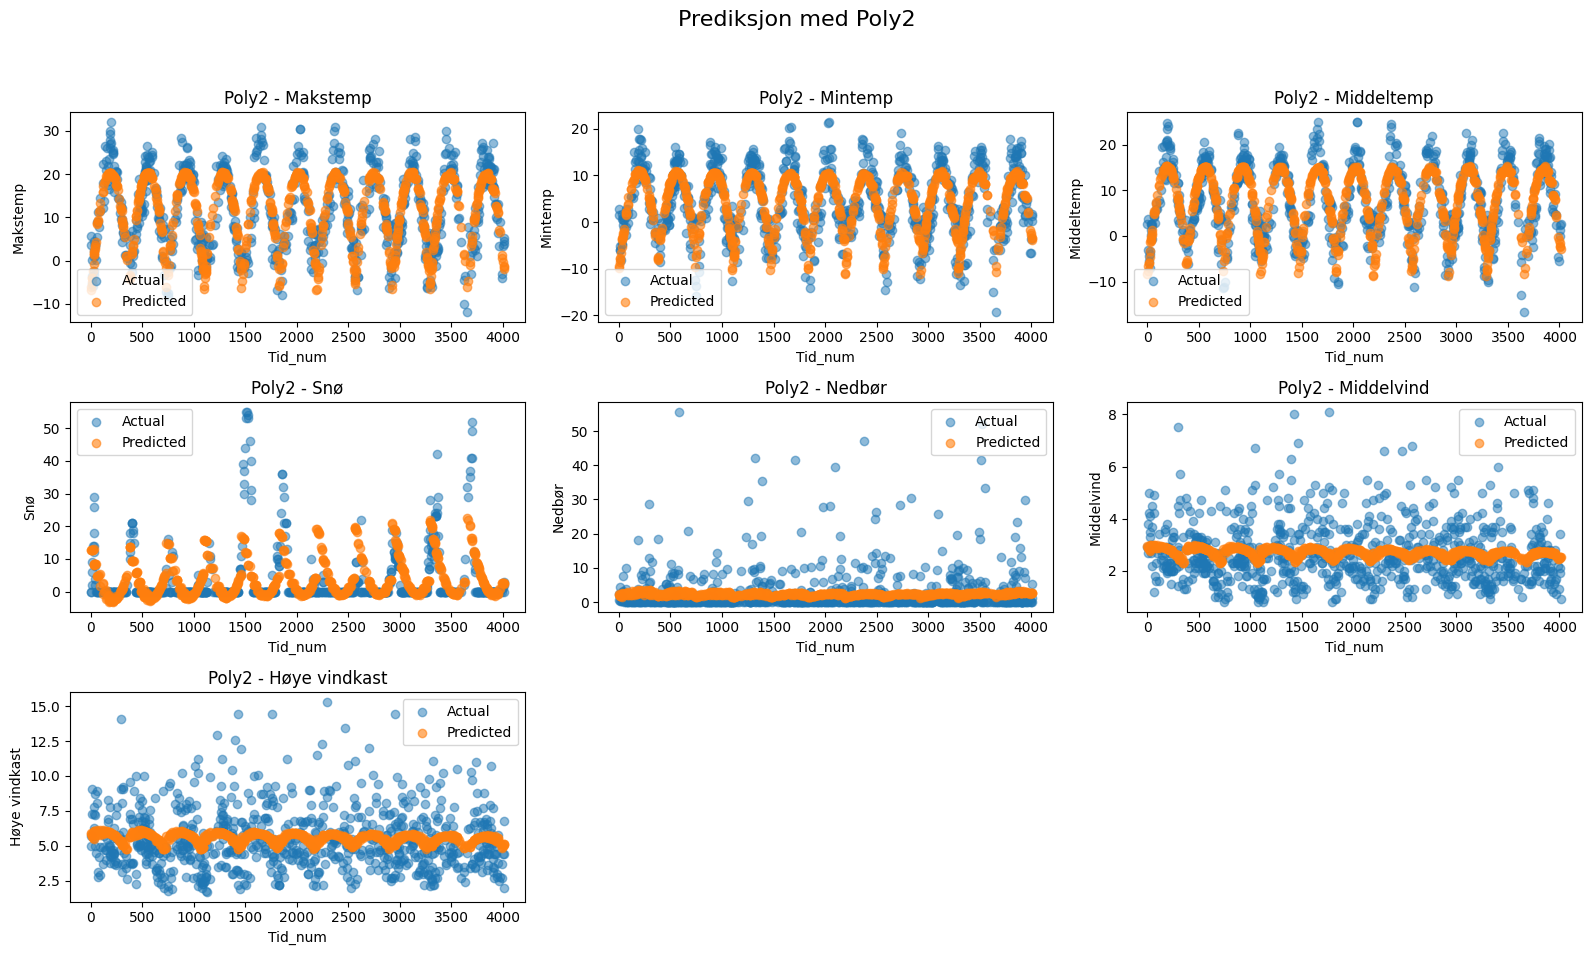

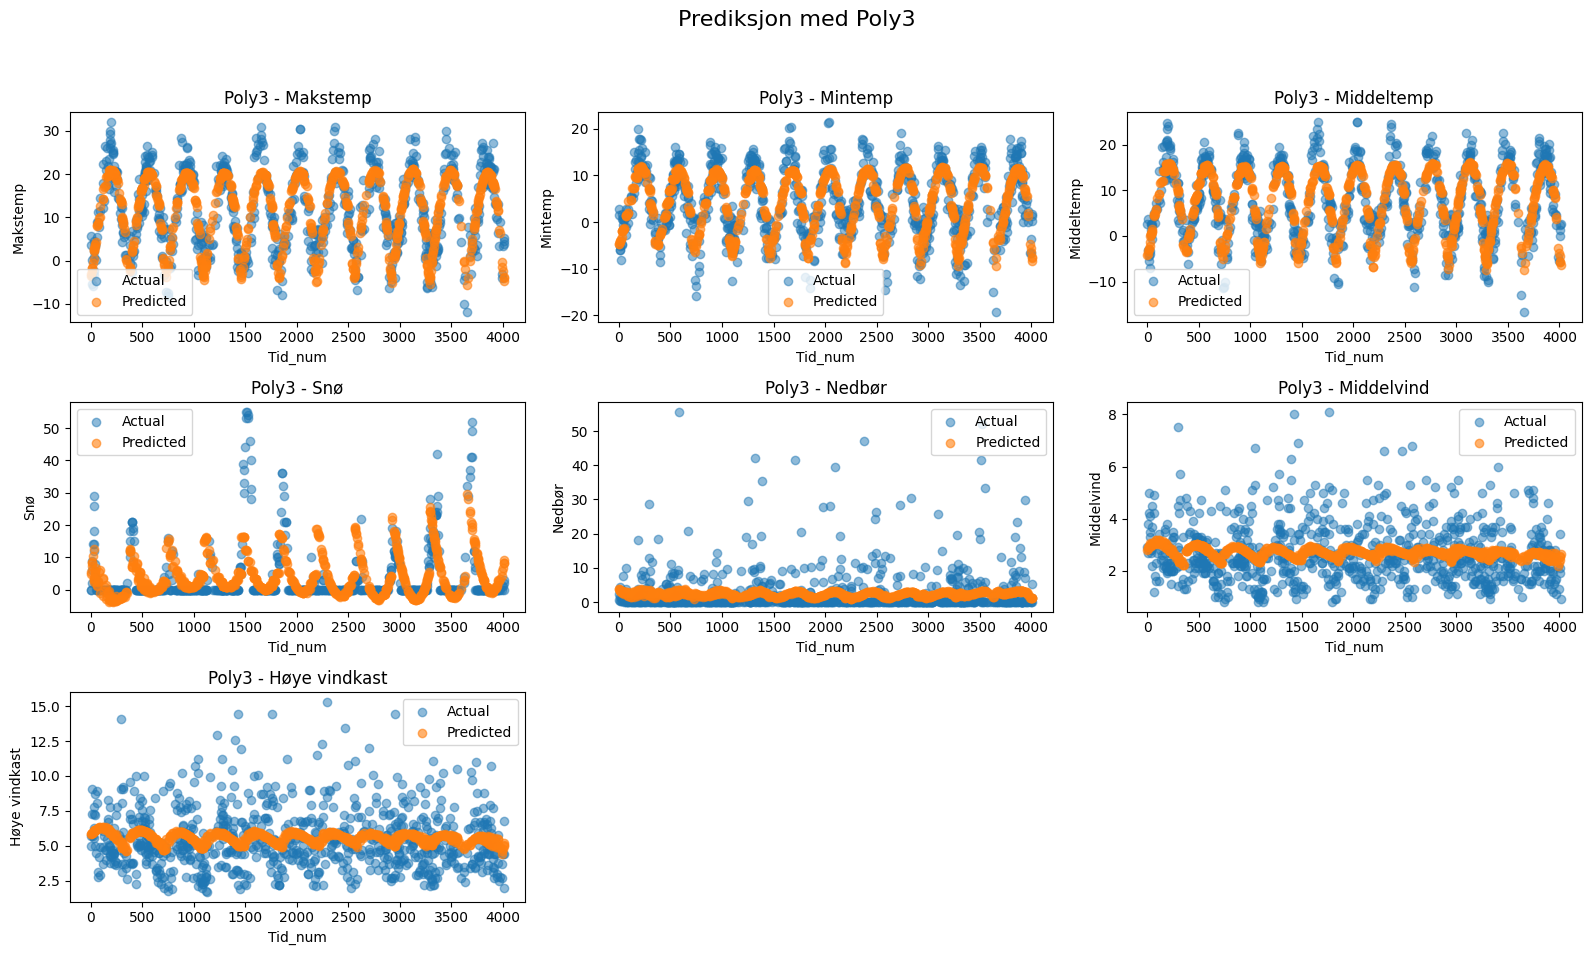

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import math
import pandas as pd

# NB! Assume that X and y sets are all from the celle including '# MANAGING CATEGORIAL DATA' and '# DIVIDING DATA'

X_train = X_train.drop(columns=['Tid'], errors='ignore')
X_test = X_test.drop(columns=['Tid'], errors='ignore')
X_test = X_test[X_train.columns]

# Selected modells
modell_definations = {
    "Linear": LinearRegression(),
    "Poly2": make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()),
    "Poly3": make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
}

# Preparing a libary for all of the preditcions to every model
predictions = {}

for name, modell in modell_definations.items():
    modell.fit(X_train, y_train)
    y_pred = modell.predict(X_test)
    predictions[name] = y_pred

# Columnnames
feature_names = X_train.columns
target_names = y_train.columns

# Number of subplots
num_features = X_test.shape[1]
num_targets = y_test.shape[1]
num_cols = math.ceil(math.sqrt(num_targets))
num_rows = math.ceil(num_targets / num_cols)

# Plotting all of the modells in one loop
for modellname, y_pred in predictions.items():
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 10))
    axes = axes.flatten()
    
    for j in range(len(target_names)):
        ax = axes[j]
        ax.scatter(X_test.iloc[:, 0], y_test.iloc[:, j], label='Actual', alpha=0.5)
        ax.scatter(X_test.iloc[:, 0], y_pred[:, j], label='Predicted', alpha=0.6)

        ax.set_xlabel(f'{feature_names[0]}')
        ax.set_ylabel(f'{target_names[j]}')
        ax.set_title(f'{modellname} - {target_names[j]}')
        ax.legend()
    
    # Remove extra subplots
    for i in range(len(target_names), len(axes)):
        fig.delaxes(axes[i])
    
    fig.suptitle(f'Prediksjon med {modellname}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Fra kapittel 10 i Notebook innunder *Complete example: CRISP_DM process - Linear regression* så står om hvordan evaluere regresjonsmodellen på ytelse ved hjelp av passende metoder som beregning av feilmål ved f.eks. berregning av *Mean Absolute Error (MAE)* og *R-squared (R²)*. Ut ifra de tre modellene ovenfor lages det til en dataframe med dissemålingene for å avgjøre hvilken modell som er mest optimal å jobbe videre med.

* **Mean Absolute Error (MAE):** Hvor mange enheter unna den predikerte verdien er fra den historisk målte verdien.
* **R-squared (R²) Value:** Viser til variansen og kan tolkes som en prosentvis presisjon. R² rangeres fra 0 til 1. Hvor 0 er en modell som ikke viser noe varians, mens 1 viser til all. Negativ betyr at modellen er verre enn å ta gjennomsnitt.
* **MSE**

Med disse verdiene er det rom til forbedring og derfer velger vi å gå fra polynomer til en foreslåt modell av chat - kalt RandomForestRegressor.

R² ranges from 0 to 1, where:
0: The model explains none of the variance in the dependent variable.
1: The model explains all the variance in the dependent variable.

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Results of evaluationvalues per modell
evaluation = []

for modellnavn, y_pred in predictions.items():
    # Sørg for 2D-format hvis bare én målvariabel
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)

    for i, target in enumerate(target_names):
        y_true = y_test.iloc[:, i]
        y_hat = y_pred[:, i]

        mae = mean_absolute_error(y_true, y_hat)
        mse = mean_squared_error(y_true, y_hat)
        r2 = r2_score(y_true, y_hat)

        evaluation.append({
            'Modell': modellnavn,
            'Målvariabel': target,
            'MAE': mae,
            'MSE': mse,
            'R²': r2
        })

# Converting 'evaluation' to a df
eval_df = pd.DataFrame(evaluation)

eval_df

Modell    Målvariabel       MAE        MSE        R²
0   Linear       Makstemp  7.692213  80.981211  0.014815
1   Linear        Mintemp  5.966353  51.832393  0.044708
2   Linear     Middeltemp  6.598184  61.270868  0.029369
3   Linear            Snø  5.084458  61.679494  0.193975
4   Linear         Nedbør  3.545942  41.788869 -0.000420
5   Linear     Middelvind  0.868470   1.267625  0.009445
6   Linear  Høye vindkast  1.691227   4.751802  0.007393
7    Poly2       Makstemp  3.569271  20.578709  0.749648
8    Poly2        Mintemp  3.511397  18.748048  0.654466
9    Poly2     Middeltemp  3.301565  17.055183  0.729818
10   Poly2            Snø  3.985783  51.922751  0.321476
11   Poly2         Nedbør  3.548999  41.569837  0.004823
12   Poly2     Middelvind  0.861453   1.249079  0.023938
13   Poly2  Høye vindkast  1.663942   4.610576  0.036894
14   Poly3       Makstemp  3.441894  19.129071  0.767283
15   Poly3        Mintemp  3.239647  16.399936  0.697742
16   Poly3     Middeltemp  3.067315  15.216580  0.758944
17   Poly3            Snø  4.149565  50.895223  0.334904
18   Poly3         Nedbør  3.555525  41.115317  0.015704
19   Poly3     Middelvind  0.859157   1.247195  0.025410
20   Poly3  Høye vindkast  1.657359   4.590286  0.041132

Utslaget viser til et stort forbedringspotensial til så og si alle modellene med unntakk av temperatur. Ettersom de fungerer syklisk med polynomene. Resterende blir regnet som støy og derfor vil utslaget på  R² være lavt. Prøver dermed med ny modell foreslått av ChatGPT for å se forbedringspotensialet. 

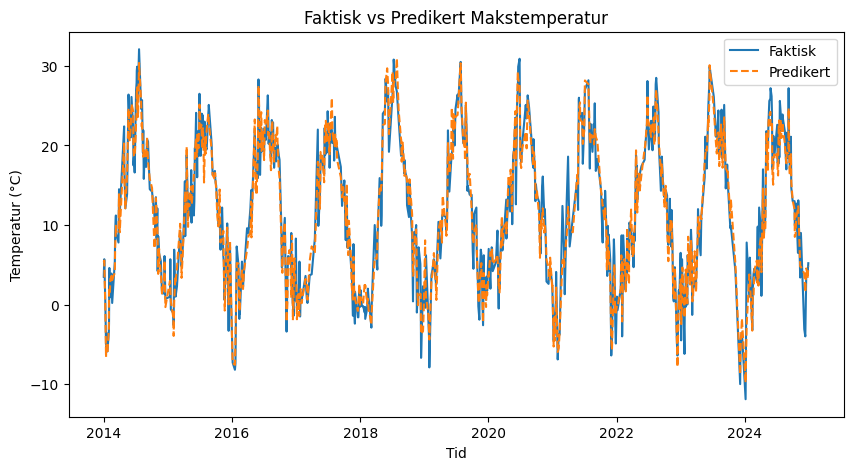

Målvariabel       MAE        MSE        R²
0       Makstemp  1.741693   4.976502  0.939458
1        Mintemp  1.887330   5.736619  0.894272
2     Middeltemp  1.355165   3.104352  0.950822
3            Snø  0.411938   1.776679  0.976782
4         Nedbør  3.250456  44.143981 -0.056802
5     Middelvind  0.815945   1.156846  0.096011
6  Høye vindkast  1.580965   4.449697  0.070500

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

# NB! Assumes that every cell to this one has run, so X and y sets are allready defined 

df_final = df.copy()
df_final['sin_måned'] = np.sin(2 * np.pi * df_final['Tid'].dt.month / 12)
df_final['cos_måned'] = np.cos(2 * np.pi * df_final['Tid'].dt.month / 12)
results = []
predictions = {}

for target in y_train.columns:
    model = RandomForestRegressor()
    model.fit(X_train, y_train[target])

    y_pred = model.predict(X_test)
    predictions[target] = y_pred  # Saved for potenial use afterwards

    mae = mean_absolute_error(y_test[target], y_pred)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)

    results.append({
        "Målvariabel": target,
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    })

    # Plotting for 'Makstemp' just to visualize
    if target == 'Makstemp':
        # Adding 'Tid' if 'Tid' not in X_test
        tid_column = df_final.loc[X_test.index, 'Tid']
        
        # Make a DataFrame for both historic/empirically and predicted
        plot_df = pd.DataFrame({
            'Tid': tid_column,
            'Faktisk': y_test[target].values,
            'Predikert': y_pred
        })

        # Sort values after Tid
        plot_df = plot_df.sort_values(by='Tid')

        plt.figure(figsize=(10, 5))
        plt.plot(plot_df['Tid'], plot_df['Faktisk'], label='Faktisk')
        plt.plot(plot_df['Tid'], plot_df['Predikert'], label='Predikert', linestyle='--')
        plt.title('Faktisk vs Predikert Makstemperatur')
        plt.xlabel('Tid')
        plt.ylabel('Temperatur (°C)')
        plt.legend()
        plt.show()

# Evaluation of the modell
eval_df = pd.DataFrame(results)
eval_df



Nok en gang kommer temperatur godt ut av modellen foreslått av ChatGPT, men dette gjelder også nå for Snø. Vind og Nedbør blik likvel regnet som støy. Med en modell som treffer ganske bra lager vi en predikasjon av temperatur og snø for de kommende årene.

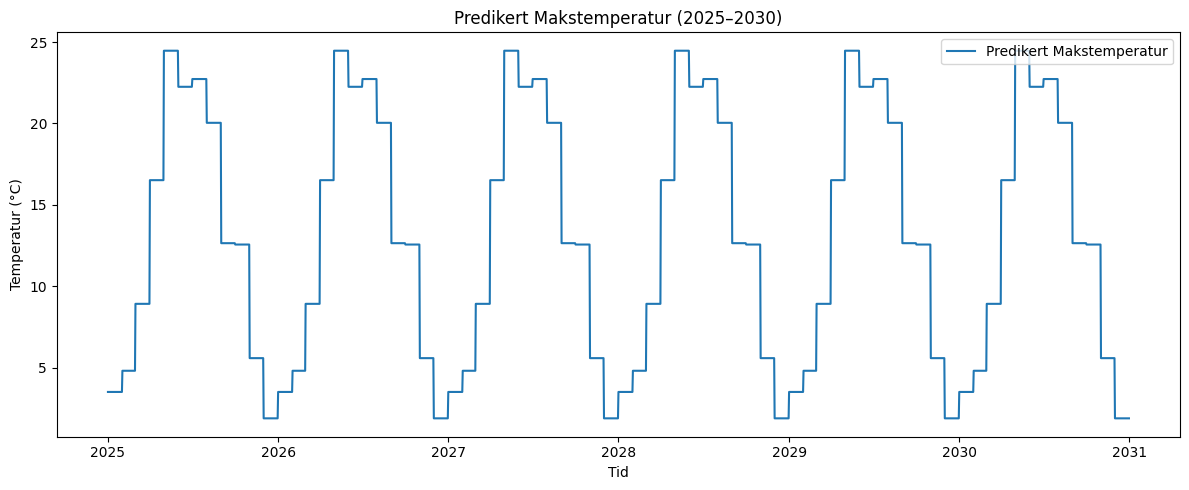

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Lag fremtidige datoer (hver dag)
fremtidige_datoer = pd.date_range(start='2025-01-01', end='2030-12-31', freq='D')
fremtid_df = pd.DataFrame({'Tid': fremtidige_datoer})

# Lag inputvariabler (samme som X_train)
fremtid_df['Tid_num'] = (fremtid_df['Tid'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(days=1)
fremtid_df['År'] = fremtid_df['Tid'].dt.year
fremtid_df['Måned'] = fremtid_df['Tid'].dt.month

# Lag fremtidig X med samme kolonner som X_train
X_fremtid = fremtid_df[X_train.columns]  # sikrer riktig navn og rekkefølge

# Tren modellen for 'Makstemp' på nytt (hvis ikke lagret tidligere)
modell_makstemp = RandomForestRegressor()
modell_makstemp.fit(X_train, y_train['Makstemp'])

# Prediker fremtidig makstemperatur
fremtid_pred = modell_makstemp.predict(X_fremtid)

# Sett inn prediksjon i fremtid_df
fremtid_df['Predikert_Makstemp'] = fremtid_pred

# Plot resultat
plt.figure(figsize=(12, 5))
plt.plot(fremtid_df['Tid'], fremtid_df['Predikert_Makstemp'], label='Predikert Makstemperatur')
plt.title('Predikert Makstemperatur (2025–2030)')
plt.xlabel('Tid')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.tight_layout()
plt.show()


**Feilmelding** - mangler å bli ferdigstilt, men skal i utgangspunktet vise hvordan outliers og spredningen med boxplot er blitt forskjell fra predikasjon og historisk data.

-->

In [ ]:
# Forutsetter at du har gjort dette i forrige celle
# prediksjoner['Snø'] er nå en DataFrame med 'År' og 'Prediksjon'

snø_pred_df = prediksjoner['Snø'].copy()
snø_pred_df.rename(columns={'Prediksjon': 'Snø'}, inplace=True)

# Lag to plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Faktiske verdier
sns.boxplot(data=df_modified, x='År', y='Snø', ax=axs[0])
axs[0].set_title("Faktisk snøfordeling per år")
axs[0].tick_params(axis='x', rotation=45)

# Predikerte verdier
sns.boxplot(data=snø_pred_df, x='År', y='Snø', ax=axs[1])
axs[1].set_title("Predikert snøfordeling per år")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Ettersom Vind og Nedbør ikke treffer like godt og er vanskelig å anslå for hvordan det vil gå frem i tid, kan en heller gå for en annen fremgangsmåte. Nemlig heller se på forekomsten av ekstremvær og se om utviklingen er økende, minkende eller er konstant. Tar igjen i bruk datframet som ble laget under data_analysis.

In [51]:
# Henter inn biblioteker og datasett

from modelling.data_analysis import DataAnalysis

import json

bins_path = os.path.join(os.getcwd(), "..", "data", "bins.json")
with open(bins_path, "r", encoding="utf-8") as f:
    bin_defs = json.load(f)


da = DataAnalysis(df, 'Middeltemp', ['Snø', 'Nedbør', 'Høye vindkast'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)

# Hent data over grenseoverskridelser per år
df_over_limits = da.years_severity()
df_over_limits = df_over_limits.reset_index()

# Skriv ut grensene som ble brukt
print('Grensene som ble brukt:')
for k, v in da.limits.items():
    print(f"- {k}: {v:.2f}")

df_over_limits

Grensene som ble brukt:
- Middelvind: 20.80
- Nedbør: 20.00
- Makstemp: 25.25
- Mintemp: 20.50
- Middeltemp: 22.35
- Snø: 29.50
- Høye vindkast: 7.40


Tid  Middelvind  Nedbør  Makstemp  Mintemp  Middeltemp  Snø  \
0   2014           0       5        28        0           9    1   
1   2015           0       7         5        0           0    0   
2   2016           0       4        12        0           2    0   
3   2017           0       6         4        0           0    0   
4   2018           0       5        56        1          19   84   
5   2019           0       7        17        2           4   20   
6   2020           0      14        26        0           5    0   
7   2021           0       4        24        0           3    0   
8   2022           0       6        16        0           1    0   
9   2023           0       9        18        0           4    7   
10  2024           0       6        15        0           1   55   

    Høye vindkast  
0              79  
1              76  
2              86  
3              70  
4              66  
5              79  
6              82  
7              60  
8              58  
9              58  
10             58

Lager til en modell for hver værvariabel basert på tiden/årstallet, og lager til et subplot.

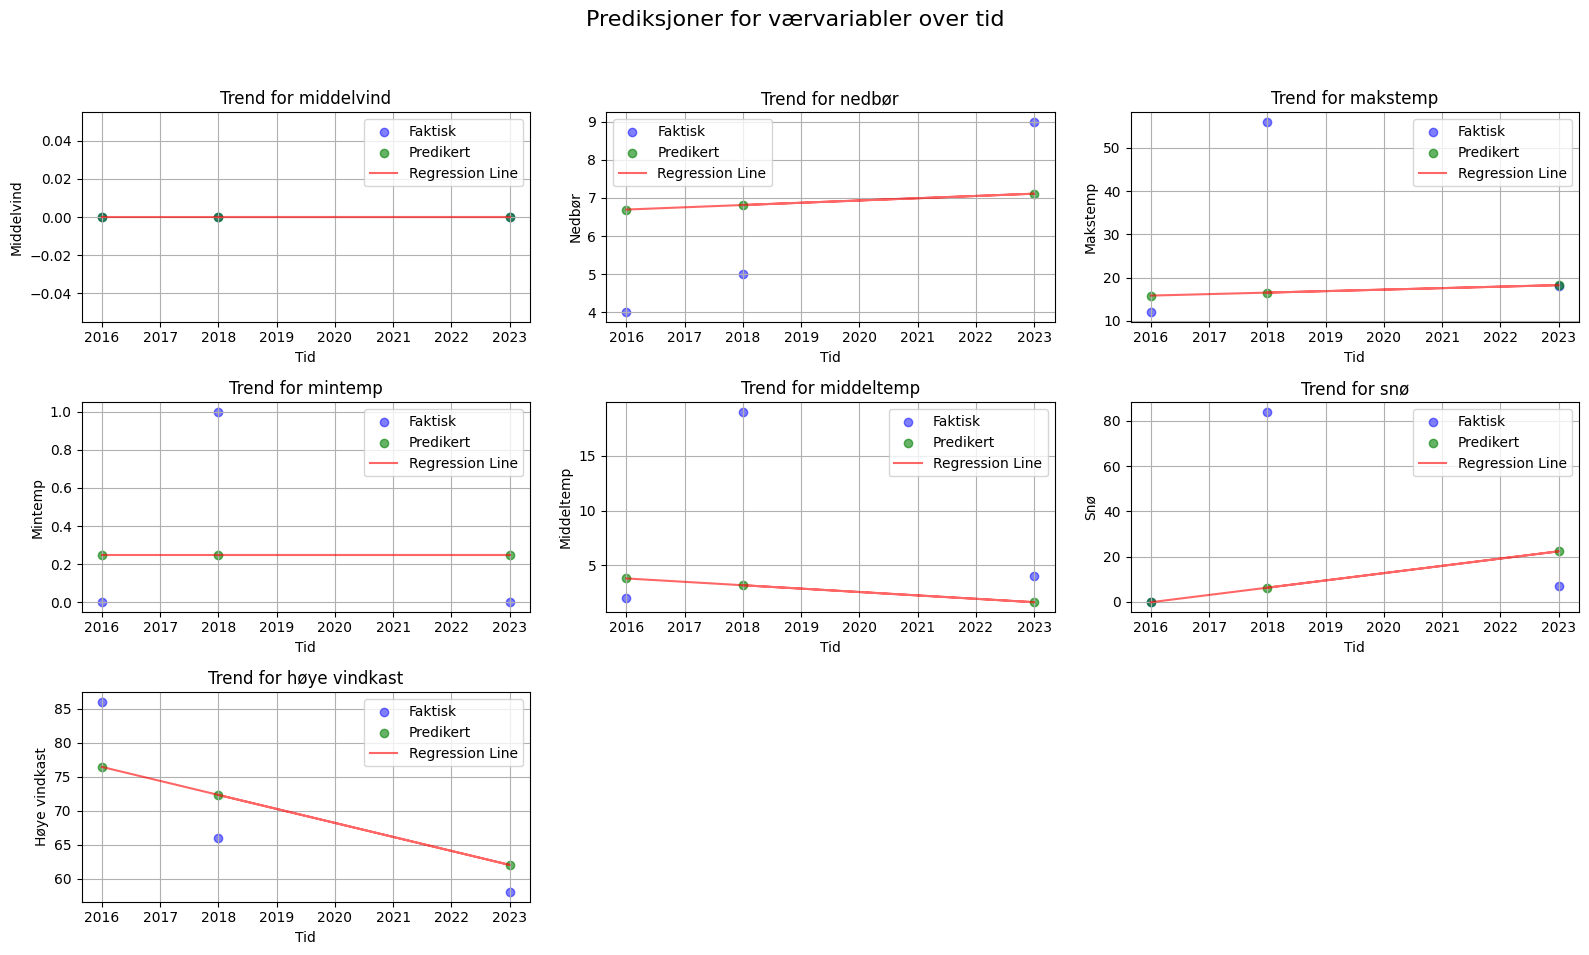

In [64]:
import math
import matplotlib.pyplot as plt

# Velg målvariabel (y) og funksjoner (X)
X = df_over_limits[['Tid']].copy()  # Her er Tid allerede int (2014, 2015, ...)
y = df_over_limits.drop(columns=['Tid'])  # fjerner Tid så den ikke blir brukt som mål

# Tren én modell per værvariabel
results = {}
for col in y.columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    results[col] = {
        "model": model,
        "predictions": predictions,
        "mse": mse,
        "y_test": y_test,
        "coefficients": model.coef_
    }

    # Samle alle y_test og predictions til DataFrames med samme kolonner
    y_tests_df = pd.DataFrame({col: results[col]["y_test"].values for col in results})
    y_preds_df = pd.DataFrame({col: results[col]["predictions"] for col in results})

# Kolonnenavn
target_names = y_tests_df.columns
feature_name = X_test.columns[0]  # 'Tid', antas bare én

# Antall subplots
num_targets = len(target_names)
num_cols = math.ceil(math.sqrt(num_targets))
num_rows = math.ceil(num_targets / num_cols)

# Lag figuren
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 10))

# Sikre at axes er en flat liste
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

# Plott hver værvariabel
for j, target in enumerate(target_names):
    ax = axes[j]
    ax.scatter(X_test[feature_name], y_tests_df[target], color='blue', label='Faktisk', alpha=0.5)
    ax.scatter(X_test[feature_name], y_preds_df[target], color='green', label='Predikert', alpha=0.6)
    # Plotting the regression line
    ax.plot(X_test[feature_name], y_preds_df[target], color='red', label='Regression Line', alpha=0.6)
    ax.grid(True)
    ax.set_xlabel('Tid')
    ax.set_ylabel(target)
    ax.set_title(f'Trend for {target.lower()}')
    ax.legend()

# Fjern ubrukte akser hvis ikke kvadratisk antall
for i in range(len(target_names), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Prediksjoner for værvariabler over tid', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


For å se koeffsientene og hvor gode modellene er:

In [62]:
resultater_df = pd.DataFrame({
    "MSE": {col: results[col]["mse"] for col in results},
    "Koefisient": {col: results[col]["coefficients"][0] for col in results}
})

resultater_df

MSE    Koefisient
Middelvind        0.000000 -0.000000e+00
Nedbør            4.709030  5.952381e-02
Makstemp        524.235107  3.452381e-01
Mintemp           0.229167 -9.211181e-18
Middeltemp       86.322125 -3.095238e-01
Snø            2091.790816  3.214286e+00
Høye vindkast    49.172572 -2.059524e+00